# Q1 Sobel

## a)

In [31]:
import numpy as np
import cv2
from random import randrange
import math
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# generate random matrix with size n*n

def generateRandomMatrix(n):
    m=np.zeros((n,n))
    for i in range (n):
      for j in range(n):
        m[i,j]=randrange(255)
    return m
    

In [33]:
# write convolution function
def convolve(matrix, kernel):
    
    # define the new matrix with borders :
  matborder=cv2.copyMakeBorder(matrix,1,1,1,1,cv2.BORDER_CONSTANT,None,[0,0,0])
    
  def calc_dot_product(a,b):
    res = 0
    for i in range(3):
      for j in range(3):
        res +=a[i][j]*b[i][j]
    return res
  sh=matrix.shape
  #output
  cnv=np.zeros(sh)
  n=len(matrix)
  #convolve matrix with kernel
  for i in range(1,n+1):
    for j in range(1,n+1):
      cnv[i-1][j-1] = calc_dot_product(kernel, [
        [matborder[i-1,j-1],matborder[i-1,j],matborder[i-1,j+1]],
        [matborder[i,j-1],matborder[i,j],matborder[i,j+1]],
        [matborder[i+1,j-1],matborder[i+1,j],matborder[i+1,j+1]]
      ])

  return cnv
      

In [34]:
# generate horizontal and vertical kernels
kernel_hor=np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
kernel_ver=np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
    ])

<Figure size 640x480 with 0 Axes>

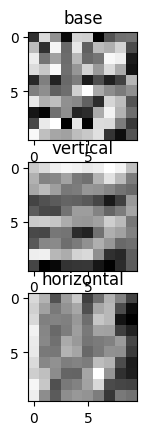

<Figure size 640x480 with 0 Axes>

In [35]:
# convolve the initial matrix with kernels
m=generateRandomMatrix(10)
g_y=convolve(m,kernel_ver)
g_x=convolve(m,kernel_hor)
plt.subplot(3,1,1)
plt.title('base')
plt.imshow(m,cmap='gray')

plt.subplot(3,1,2)
plt.title('vertical')
plt.imshow(g_y,cmap='gray')

plt.subplot(3,1,3)
plt.title('horizontal')
plt.imshow(g_x,cmap='gray')
plt.figure()

<Figure size 640x480 with 0 Axes>

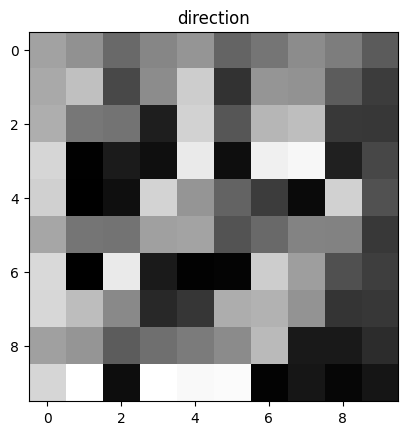

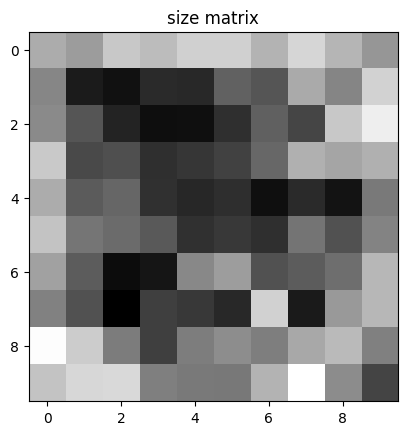

<Figure size 640x480 with 0 Axes>

In [36]:
# generate magnitude and direction matrixes
smat=np.zeros(m.shape)
direc=np.zeros(m.shape)
for i in range(len(m)):
    for j in range(len(m[0])):
        c=pow(g_x[i,j],2)+pow(g_y[i,j],2)
        smat[i,j]=math.sqrt(c)
        direc[i,j]=math.atan2(g_x[i,j],g_y[i,j])
plt.title('direction')
plt.imshow(direc,cmap='gray')
plt.figure()
plt.title('size matrix')
plt.imshow(smat,cmap='gray')
plt.figure()


## b)

In [37]:
# load image and convert it to gray scale
img=cv2.imread('./images/afshin.jpg',0)

In [38]:
# define gaussian kernel
gau_kernel=np.array([
    [1/16,1/8,1/16],
    [1/8,1/4,1/8],
    [1/16,1/8,1/16]
])

<Figure size 640x480 with 0 Axes>

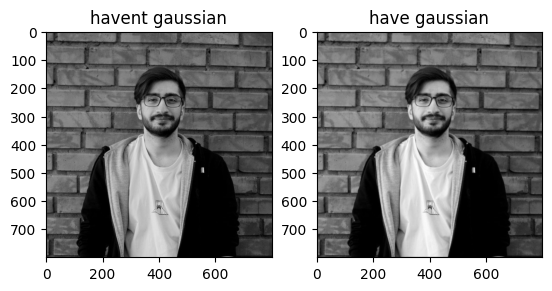

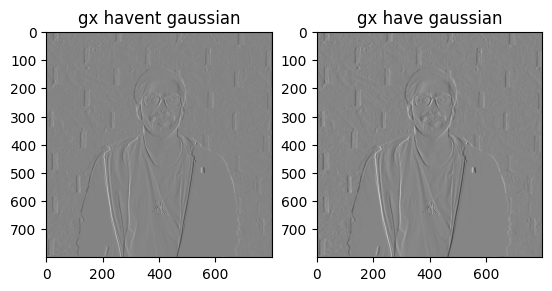

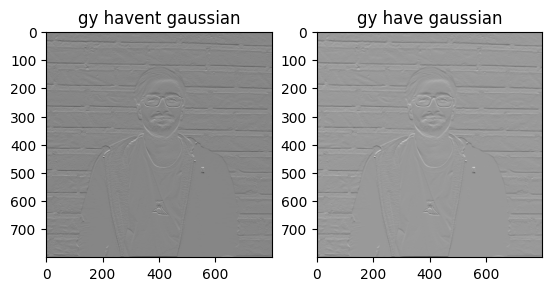

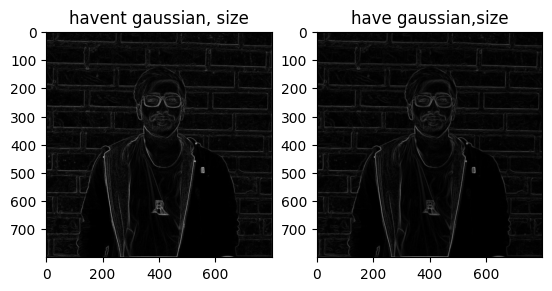

<Figure size 640x480 with 0 Axes>

In [39]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
gau_img=convolve(img,gau_kernel)
#haven't gaussian filter ,after have it
g_x1=convolve(img,kernel_hor)
g_y1=convolve(img,kernel_ver)
size_img=np.zeros(img.shape)
direc_1=np.zeros(img.shape)

ga_gx=convolve(gau_img,kernel_hor)
ga_gy=convolve(gau_img,kernel_ver)
size_img_ga=np.zeros(img.shape)
direc_ga1=np.zeros(img.shape)
nsize=len(img)
for i in range (nsize):
    for j in range(len(img[0])):
        cc=pow(g_x1[i,j],2) +pow(g_y1[i,j],2)
        size_img[i,j]=math.sqrt(cc)
        direc_1[i,j]=math.atan2(g_x1[i,j],g_y1[i,j])
        size_img_ga[i,j]=math.sqrt(pow(ga_gx[i,j],2) +pow(ga_gy[i,j],2))
        direc_ga1[i,j]=math.atan2(ga_gx[i,j],ga_gy[i,j])

plt.subplot(1,2,1)
plt.title('havent gaussian')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('have gaussian')
plt.imshow(gau_img,cmap='gray')
plt.figure()

plt.subplot(1,2,1)
plt.title('gx havent gaussian')
plt.imshow(g_x1,cmap='gray')
plt.subplot(1,2,2)
plt.title('gx have gaussian')
plt.imshow(ga_gx,cmap='gray')
plt.figure()

plt.subplot(1,2,1)
plt.title('gy havent gaussian')
plt.imshow(g_y1,cmap='gray')
plt.subplot(1,2,2)
plt.title('gy have gaussian')
plt.imshow(ga_gy,cmap='gray')
plt.figure()

plt.subplot(1,2,1)
plt.title('havent gaussian, size')
plt.imshow(size_img,cmap='gray')
plt.subplot(1,2,2)
plt.title('have gaussian,size')
plt.imshow(size_img_ga,cmap='gray')
plt.figure()



## c)

<Figure size 640x480 with 0 Axes>

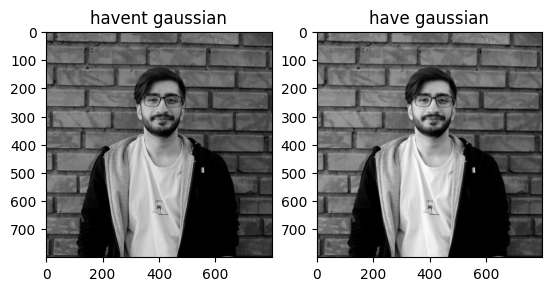

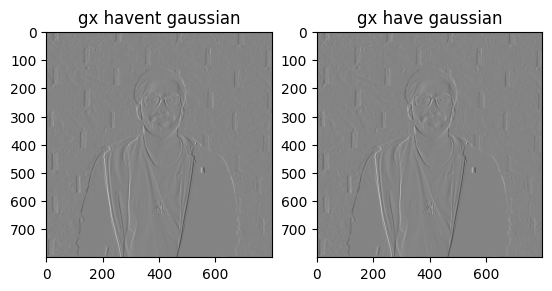

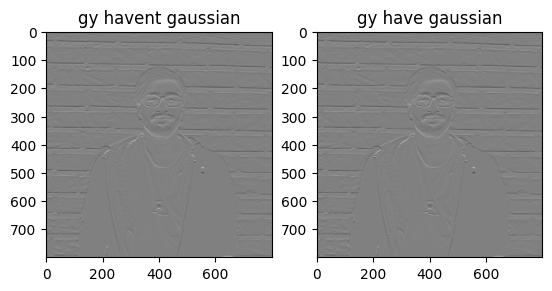

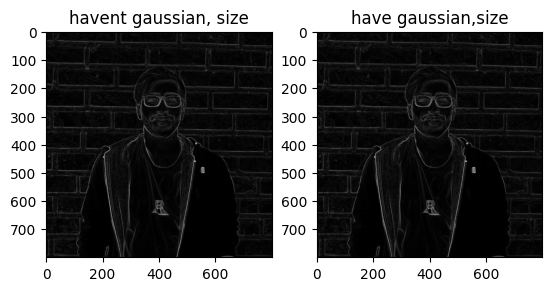

<Figure size 640x480 with 0 Axes>

In [40]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
gau_image=cv2.GaussianBlur(img,(3,3),0)

#sobel inputs cv2
#(sourceimg,depth of output img,h_flag(for horizontal),v_flag(for vertical),size of kernel)

gx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
gy=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
size_m=np.zeros(img.shape)
direc=np.zeros(img.shape)

#gaussian
gx_g=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
gy_g=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
size_mg=np.zeros(img.shape)
direc_g=np.zeros(img.shape)


for i in range (nsize):
    for j in range(len(img[0])):
        c=pow(gx[i,j],2) + pow(gy[i,j],2)
        size_m[i,j]=math.sqrt(c)
        direc[i,j]=math.atan2(g_x1[i,j],g_y1[i,j])
        size_mg[i,j]=math.sqrt(pow(gx_g[i,j],2) +pow(gy_g[i,j],2))
        direc_g=math.atan2(gx_g[i,j],gy_g[i,j])

plt.subplot(1,2,1)
plt.title('havent gaussian')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('have gaussian')
plt.imshow(gau_image,cmap='gray')
plt.figure()

plt.subplot(1,2,1)
plt.title('gx havent gaussian')
plt.imshow(gx,cmap='gray')
plt.subplot(1,2,2)
plt.title('gx have gaussian')
plt.imshow(gx_g,cmap='gray')
plt.figure()

plt.subplot(1,2,1)
plt.title('gy havent gaussian')
plt.imshow(gy,cmap='gray')
plt.subplot(1,2,2)
plt.title('gy have gaussian')
plt.imshow(gy_g,cmap='gray')
plt.figure()

plt.subplot(1,2,1)
plt.title('havent gaussian, size')
plt.imshow(size_m,cmap='gray')
plt.subplot(1,2,2)
plt.title('have gaussian,size')
plt.imshow(size_mg,cmap='gray')
plt.figure()
